# <div style = 'background-color:skyblue'> <center> 3rd_Mini_Project_Clustering  </div>

# Problem Statement

__Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.__

__The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc).__

In [1]:
import numpy as np                                      # Used for mathematical Calculations
import pandas as pd                                     # Used for Dealing with DataFrame
import matplotlib.pyplot as plt                         # Used for Data Visualization
import seaborn as sb                                    # Used for Data Visualization
import warnings                                         # Used for ignore Warnings 
warnings.filterwarnings("ignore")
from tabulate import tabulate                           # Used for Create tables 

from sklearn import preprocessing                       # Used for Preprocessing         
from sklearn.decomposition import PCA                   # Used for Dimension Reduction 

from sklearn.cluster import KMeans                      # Used for Kmeans Clustring
import scipy.cluster.hierarchy as sch                   # Used for making Dendogram 
from sklearn.cluster import AgglomerativeClustering     # Used for AgglomerativeClustering 

from sklearn.cluster import DBSCAN                      # Used for DBSCAN Clustring

## Reading Dataset

In [2]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")            # Reading Dataset 
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Preprocessing --

In [3]:
df.shape                                                               # Check the Structure of the data 

(200, 5)

In [4]:
df.describe()                                                          # Data Discribe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()                                                               # Check the Data Types and Other information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Checking Null Values--

In [6]:
df.isnull().sum()                                                     # Check the Null Values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Tabular format of Categorical and numerical Features

In [7]:
cat=df.select_dtypes(include="object")                                # taking Object And Numerical Columns seperately
num=df.select_dtypes(exclude="object")

In [8]:
a=list(cat.columns)
b=list(num.columns)

In [9]:
print(tabulate({"Categorical":a,"Numerical":b},headers=["Categorical","Numerical"]))  # Print Categorical and Numerical Features in a Tabular form 

Categorical    Numerical
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


In [10]:
for col in df.columns:                                                # Check the value counts of Each columns
    print(df[col].value_counts())

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64
Female    112
Male       88
Name: Gender, dtype: int64
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64


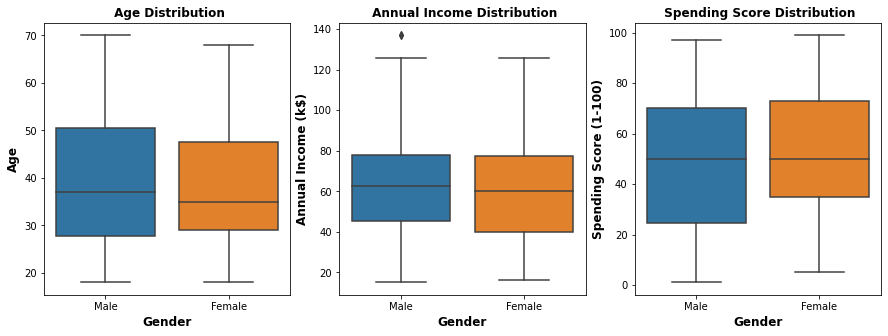

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sb.boxplot(df["Gender"],df["Age"])
plt.title(" Age Distribution",fontsize=12,fontweight="bold")
plt.xlabel("Gender",fontsize=12,fontweight="bold")
plt.ylabel("Age",fontsize=12,fontweight="bold")
plt.subplot(1,3,2)
sb.boxplot(df["Gender"],df["Annual Income (k$)"])
plt.title(" Annual Income Distribution",fontsize=12,fontweight="bold")
plt.xlabel("Gender",fontsize=12,fontweight="bold")
plt.ylabel("Annual Income (k$)",fontsize=12,fontweight="bold")
plt.subplot(1,3,3)
sb.boxplot(df["Gender"],df["Spending Score (1-100)"])
plt.title(" Spending Score Distribution",fontsize=12,fontweight="bold")
plt.xlabel("Gender",fontsize=12,fontweight="bold")
plt.ylabel("Spending Score (1-100)",fontsize=12,fontweight="bold")
plt.show()

#### In Age Distribution The Age of Male group is between 28 to 50 and The Age of Female group is between 30 to 47
#### In Annual Income Distribution The Income of Male group is between 43 to 78 and The Income of Female group is between 40 to 78
#### In Spending Score Distribution The Spending Score of Male group is between 23 to 65 and The Age of Female group is between 28 to 68

## Data Vizualization --

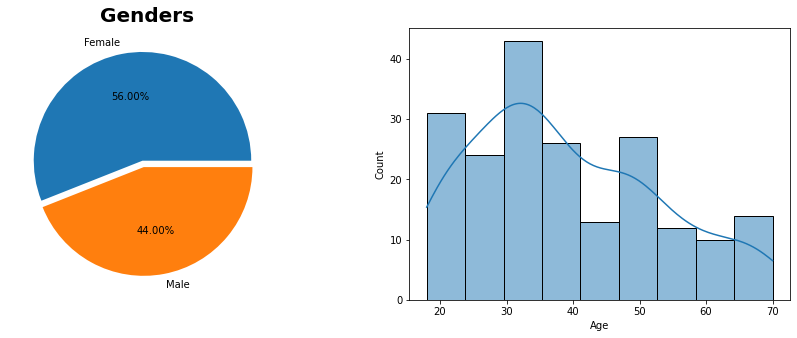

In [13]:
plt.figure(figsize=(15,5))                                 
plt.subplot(1,2,1)
plt.title(" Genders",fontsize=20,fontweight="bold")
percentage = df["Gender"].value_counts()
labels = list(df["Gender"].value_counts().index)
explode=[0.03,0.03]
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode=explode)
plt.subplot(1,2,2)
sb.histplot(df["Age"],kde=True)
plt.show()

### <font color=dark><u>INTERPRETATION :  
#### <font color=magneta > There are 56% Customers are Females and 44% Ciustomers are Males.
#### <font color=magneta > The Maximum Count of Age Between 30 to 35 and Minimum Count of Age between 60 to 65. 

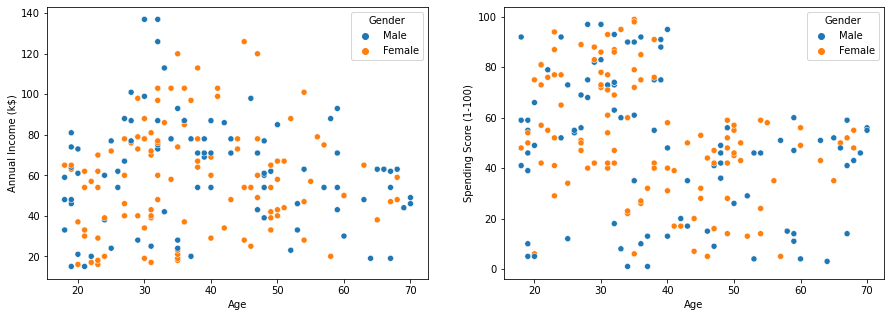

In [14]:
plt.figure(figsize=(15,5))                                 
plt.subplot(1,2,1)
sb.scatterplot(df["Age"],df["Annual Income (k$)"],hue=df["Gender"])
plt.subplot(1,2,2)
sb.scatterplot(df["Age"],df["Spending Score (1-100)"],hue=df["Gender"])
plt.show()

### <font color=dark><u>INTERPRETATION :
    
#### <font color=magneta > The Annual Income Of Age Group between 30 to 45 is Maximum.
#### <font color=magneta > The Spending Score Of Age Group between 20 to 40 is Maximum.

### <font color=dark><u>INTERPRETATION :
    
#### <font color=magneta > In Male Category The Anual Income range between 45 to 78 and In Female Category the Anual Income range between 40 to 78.
#### <font color=magneta > In Male Category The Spending Score range between 45 to 78 and In Female Category the Spending Score range between 40 to 78.

In [15]:
df["Gender"]=df["Gender"].astype("category")

## Label Encoding --

In [16]:
label_encoder=preprocessing.LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


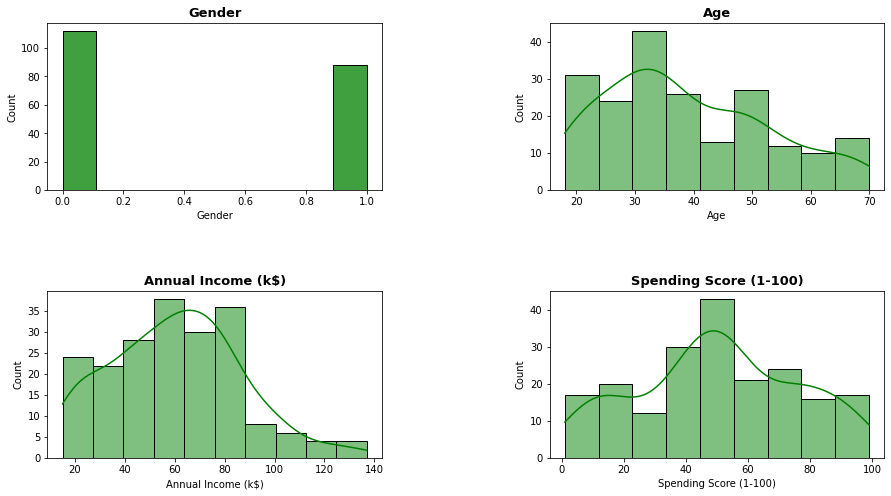

In [17]:
plt.figure(figsize =(15, 8))                                         # Set Figure Sizes 
plt.subplots_adjust(wspace=0.5)                                      # Adjust Spacing between the graphs 
plt.subplots_adjust(hspace=0.6)                                      # Adject spacing between the two graphs 
plt.subplot(2,2,1)                                                   # ploting subplots 
plt.title("Gender",fontsize=13,fontweight="bold")                    # Set title
sb.histplot(df["Gender"],color="green")                              # Creating histplot 

plt.subplot(2,2,2)
plt.title("Age",fontsize=13,fontweight="bold")
sb.histplot(df["Age"],color="green",kde=True)

plt.subplot(2,2,3)
plt.title("Annual Income (k$)",fontsize=13,fontweight="bold")
sb.histplot(df["Annual Income (k$)"],color="green",kde=True)

plt.subplot(2,2,4)
plt.title("Spending Score (1-100)",fontsize=13,fontweight="bold")
sb.histplot(df["Spending Score (1-100)"],color="green",kde=True)


plt.show()

In [18]:
dff=df[["Annual Income (k$)","Spending Score (1-100)"]]

## Kmeans Model 

181363.59595959607
106348.37306211119
73679.78903948837
44448.45544793369
37233.81451071002
30259.657207285458
25012.917069885472
21838.863692828916


Text(0.5, 1.0, 'Elbow curve')

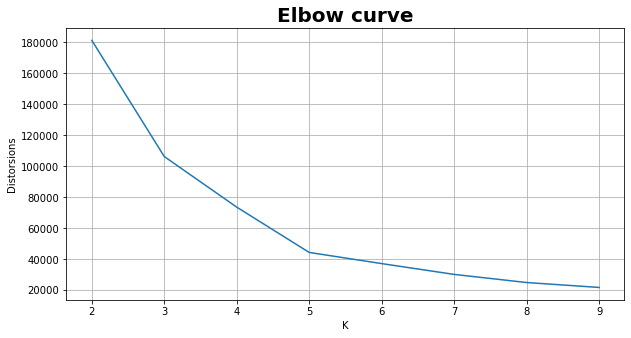

In [19]:
distortion =[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(dff)
    print(kmeans.inertia_)
    distortion.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(2,10),distortion)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title("Elbow curve",fontsize=20,fontweight="bold")

### <font color=dark><u>INTERPRETATION :
### <font color=blue > After vizualization we found that at k = 5 The inertia value is going low.

In [20]:
from sklearn.metrics import silhouette_score                         #Import Silhouette Score for Performance

In [21]:
for n_clusters in range(2,10):                                       # Checking the Performance for N samples
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(dff)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.47518553428793253
For n_clusters = 3 and The average silhouette_score is : 0.4535541830196435
For n_clusters = 4 and The average silhouette_score is : 0.3511552013509596
For n_clusters = 5 and The average silhouette_score is : 0.4397000691932588
For n_clusters = 6 and The average silhouette_score is : 0.4104980805333897
For n_clusters = 7 and The average silhouette_score is : 0.40541997912721284
For n_clusters = 8 and The average silhouette_score is : 0.380342077387119
For n_clusters = 9 and The average silhouette_score is : 0.34311017020547085


### <font color=dark><u>INTERPRETATION :
### <font color=blue > After finding the performance of different clusters we can analyse that at n cluster = 5 the performance is high.

In [22]:
kmeans_model=KMeans(n_clusters=5)                                       # Creaitng Means Model
kmeans_model.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])                                                    # Fitting the Data into model

KMeans(n_clusters=5)

In [23]:
cluster_centroid=kmeans_model.cluster_centers_                       # Find the Centroid of the Cluster
sc=pd.DataFrame(cluster_centroid)
sc


,0,1
0,25.727273,79.363636
1,26.304348,20.913043
2,86.538462,82.128205
3,55.296296,49.518519
4,88.200000,17.114286


In [24]:
KMpredict=kmeans_model.predict(df[["Annual Income (k$)","Spending Score (1-100)"]])                                   # label Predictiions
KMpredict

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [25]:
performace_score=silhouette_score(df[["Annual Income (k$)","Spending Score (1-100)"]],KMpredict)        # Find the performance of the model
performace_score

0.553931997444648

In [26]:
df["KMeans_Labels"]=KMpredict                                            # Add these labels in to the DataFrame

## Agglomerative Hierarchical Clustering algorithm

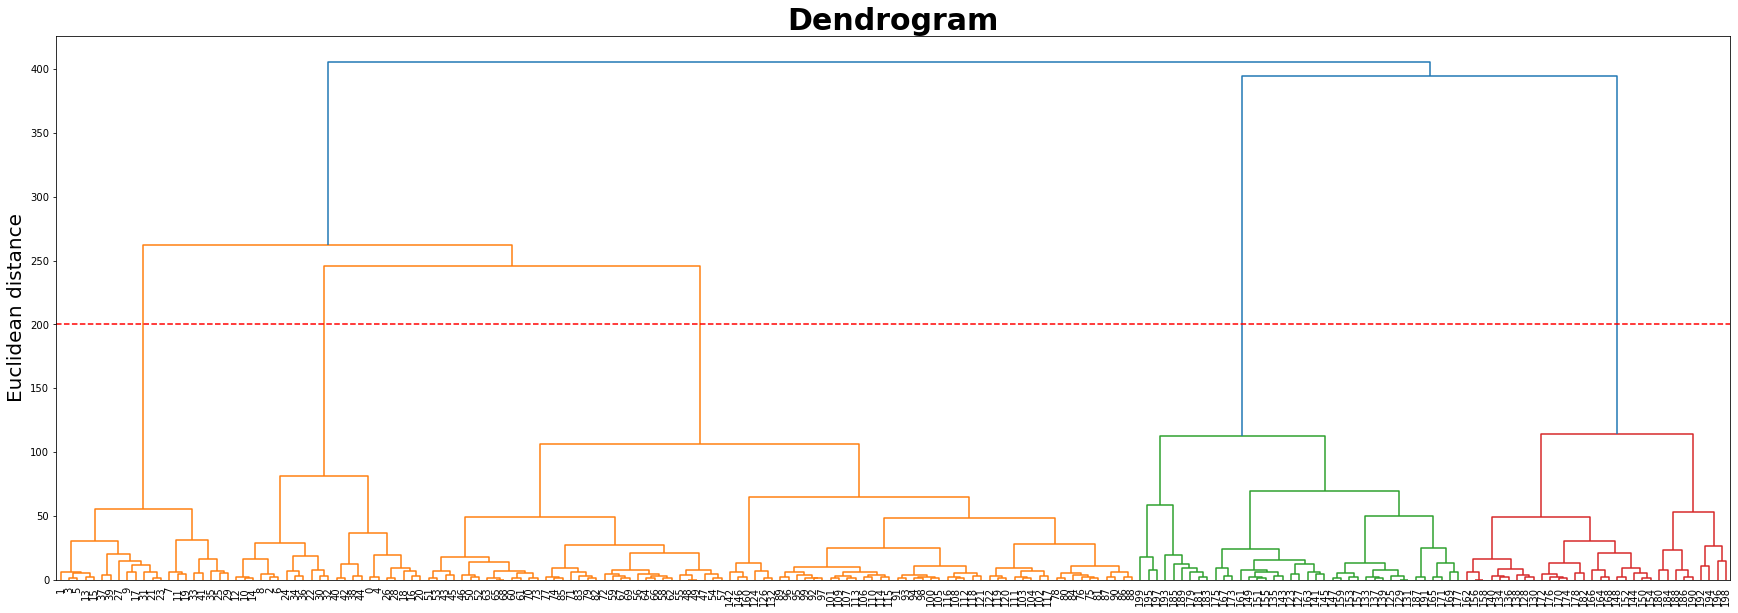

In [27]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dff, method = 'ward'),labels=df.index) #plotting dendogram
plt.axhline(y=200, color='r', linestyle='--')                     
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30,fontweight="bold")
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### <font color=dark><u>INTERPRETATION :
### <font color=blue > At Euclidean distance 200 we got 5 number of cluster .

In [28]:
Agglo_model = AgglomerativeClustering(n_clusters =5 , affinity = 'euclidean', linkage = 'ward')    #Creating Agglomerative model
Y_predict2 = Agglo_model.fit_predict(dff)                                        # fitting the model and predict the labels
Y_predict2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [29]:
performance_Agglo_model=silhouette_score(dff,Y_predict2)      # Finding the performance of the Model
print('performance:',performance_Agglo_model)

performance: 0.5529945955148897


In [30]:
df["Agglo_LABELS"]=Y_predict2                                            # Adding the Label into dataFrame as a Column

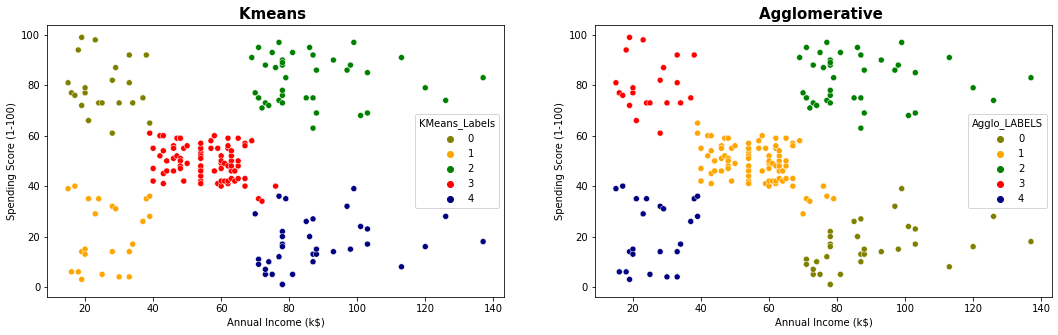

In [31]:
color=["olive","orange","green","red","navy"]
plt.figure(figsize =(18, 5))
plt.subplots_adjust(hspace=0.3) 
plt.subplot(1,2,1) 
sb.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['KMeans_Labels'],palette=color)
plt.title("Kmeans ",fontsize=15,fontweight="bold")

plt.subplot(1,2,2)
sb.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df["Agglo_LABELS"],palette=color)
plt.title("Agglomerative ",fontsize=15,fontweight="bold")
color1=["olive","green","red","navy"]
plt.show()

In [32]:
index=["KMeans_Model","AggloMerative_Hierarchical_Model"]

Performance=[performace_score,performance_Agglo_model]

In [33]:
pd.DataFrame({"Performance":Performance},index=index)

,Performance
KMeans_Model,0.553932
AggloMerative_Hierarchical_Model,0.552995


### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > After Doing all modeling approaches We Analyse that At kmeans model gives us maximum performance with 5 clusters. 

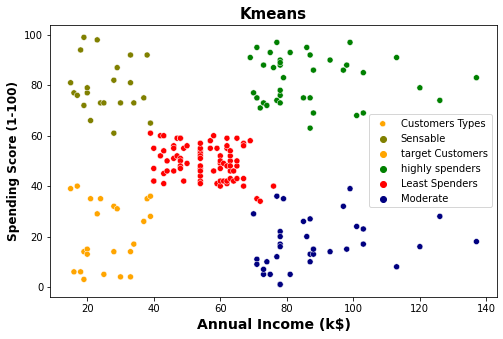

In [34]:
plt.figure(figsize =(8, 5))
labels=["Customers Types","Sensable","target Customers","highly spenders","Least Spenders","Moderate"]
sb.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df["KMeans_Labels"],palette=color)
plt.title("Kmeans",fontsize=15,fontweight="bold")
plt.xlabel("Annual Income (k$)",fontsize=14,fontweight="bold")
plt.ylabel("Spending Score (1-100)",fontsize=12,fontweight="bold")
plt.legend(labels=labels)

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > After selecting our final model we conclude that
### <font color=magneta > - Green labels Represent that these customers are Sensible
### <font color=magneta > - Olive labels Represents that these Customers are moderate  
### <font color=magneta > - Blue labels Represents that these cuustomers are Balanced 
### <font color=magneta > - Red Labels Represents that these customers are Highly Spenders 
### <font color=magneta > - Orange Labels Represents that these customers are target Customers 